In [1]:
#initial imports
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#import cleaned df 
housing_df = pd.read_csv('Resources/HousingData_clean.csv', index_col = [0])
crime_df = pd.read_csv('Resources/2018To2021CrimeData_clean.csv', index_col = [0])

In [3]:
#preview housing df 
housing_df.head()

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,hasAssociation,homeType,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt
0,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,True,Single Family,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601.0
1,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,True,Single Family,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,6185.0,1768.0
2,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,True,Single Family,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,7840.0,1478.0
3,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,True,Single Family,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,6098.0,1678.0
4,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,True,Single Family,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,6708.0,2132.0


In [4]:
#preview crime df 
crime_df.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Status,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
1,20195014472,BURGLARY OF VEHICLE,601,N,2019-04-08 22:00:00,2019-04-08,1970-01-01 00:00:00.000002200,2019-04-09 13:09:00,2019-04-09,1970-01-01 00:00:00.000001309,...,N,04/09/2019,23F,Theft,3119486.0,3119486.0,30.292247,-97.725763,"(30.29224653, -97.72576272)",2019.0
5,20191561862,POSSESSION OF MARIJUANA,1803,N,2019-06-05 22:35:00,2019-06-05,1970-01-01 00:00:00.000002235,2019-06-05 22:35:00,2019-06-05,1970-01-01 00:00:00.000002235,...,U,01/01/1888,0,None,3108421.0,3108421.0,30.193941,-97.763449,"(30.19394123, -97.76344868)",2019.0
6,20191511203,EVADING / FOOT,2723,N,2019-05-31 14:58:00,2019-05-31,1970-01-01 00:00:00.000001458,2019-05-31 14:58:00,2019-05-31,1970-01-01 00:00:00.000001458,...,C,06/04/2019,0,None,3099373.0,3099373.0,30.225732,-97.791259,"(30.22573152, -97.79125883)",2019.0
7,2019990714,BURGLARY OF RESIDENCE,500,N,2019-04-09 12:06:00,2019-04-09,1970-01-01 00:00:00.000001206,2019-04-09 12:06:00,2019-04-09,1970-01-01 00:00:00.000001206,...,N,06/04/2019,220,Burglary,3111980.0,3111980.0,30.201607,-97.751976,"(30.2016066, -97.75197579)",2019.0
10,20191561277,POSS CONTROLLED SUB/NARCOTIC,1800,N,2019-06-05 17:53:00,2019-06-05,1970-01-01 00:00:00.000001753,2019-06-05 17:53:00,2019-06-05,1970-01-01 00:00:00.000001753,...,C,06/07/2019,0,None,3179352.0,3179352.0,30.349163,-97.534373,"(30.3491627, -97.5343733)",2019.0


In [5]:
#change crime_df zipcode column to match housing_df
crime_df.rename(columns = {'Zip_Code':'zipcode'}, inplace = True)

In [6]:
#preview zipcodes 
crime_df.zipcode.unique()

array([78705., 78744., 78745., 78653., 78704., 78703., 78723., 78748.,
       78741., 78746., 78701., 78702., 78729., 78753., 78750., 78735.,
       78759., 78617., 78727., 78724., 78756., 78751., 78721., 78757.,
       78731., 78758., 78752., 78717., 78719., 78754., 78722., 78725.,
       78739., 78749., 78742., 78652., 78660., 78610., 78737., 78726.,
       78736., 78747., 78613., 78712., 78730., 78640., 78732., 78733.,
       78664., 78738., 78728., 78681., 78734., 78665., 78616., 78641.,
       78612., 78645.])

In [7]:
#preview zipcodes 
housing_df.zipcode.unique()

array([78660, 78617, 78717, 78724, 78747, 78725, 78726, 78744, 78732,
       78750, 78729, 78719, 78731, 78730, 78753, 78733, 78746, 78735,
       78734, 78737, 78619, 78759, 78739, 78652, 78653, 78758, 78749,
       78728, 78754, 78736, 78757, 78727, 78745, 78704, 78741, 78742,
       78752, 78723, 78748, 78738, 78705, 78703, 78702, 78701, 78722,
       78721, 78751, 78756])

In [8]:
#check counts for crime_df
crime_df.nunique()

Incident_Number                395028
Highest_Offense_Description       347
Highest_Offense_Code              311
Family_Violence                     2
Occurred_Date_Time             290140
Occurred_Date                    1461
Occurred_Time                    1440
Report_Date_Time               353745
Report_Date                      1523
Report_Time                      1440
Location_Type                      46
Address                         85211
zipcode                            58
Census_Tract                      314
Clearance_Status                    4
Clearance_Date                   1525
UCR_Category                       14
Category_Description                7
X-coordinate                    46733
Y-coordinate                    46733
Latitude                        81871
Longitude                       81807
Location                        81980
year                                4
dtype: int64

In [9]:
#check counts for housing_df
housing_df.nunique()

city                     9
streetAddress        15164
zipcode                 48
description          15133
latitude             14410
longitude            12480
propertyTaxRate          3
hasAssociation           2
homeType                10
yearBuilt              115
latestPrice           2365
numPriceChanges         22
latest_saledate        958
latest_salemonth        12
latest_saleyear          4
latestPriceSource      225
lotSizeSqFt           1426
livingAreaSqFt        3650
dtype: int64

In [10]:
#change zipcode in crime_df from float to int 
crime_df['zipcode'] = crime_df['zipcode'].astype(int)
crime_df.zipcode.dtype
crime_df.zipcode.unique()

array([78705, 78744, 78745, 78653, 78704, 78703, 78723, 78748, 78741,
       78746, 78701, 78702, 78729, 78753, 78750, 78735, 78759, 78617,
       78727, 78724, 78756, 78751, 78721, 78757, 78731, 78758, 78752,
       78717, 78719, 78754, 78722, 78725, 78739, 78749, 78742, 78652,
       78660, 78610, 78737, 78726, 78736, 78747, 78613, 78712, 78730,
       78640, 78732, 78733, 78664, 78738, 78728, 78681, 78734, 78665,
       78616, 78641, 78612, 78645])

In [21]:
#check the occurance of crimes by zipcode 
crime_df['zipcode'].value_counts()

78741    31435
78753    31072
78758    30893
78701    25870
78704    25750
78745    23251
78723    21554
78744    21305
78702    17207
78752    13892
78759    13881
78748    13513
78751    10309
78705     9271
78757     9211
78721     7132
78749     6965
78724     6658
78727     6509
78729     6399
78754     6051
78731     5780
78703     5623
78750     5435
78746     5230
78717     3553
78617     3417
78735     3378
78756     3288
78747     3271
78660     3005
78722     2980
78726     2580
78719     2107
78613     1940
78736     1041
78730     1028
78739     1000
78725      624
78742      467
78653      349
78728      258
78712      177
78652      127
78732       70
78737       63
78610       24
78733       23
78681       16
78664       13
78738        9
78734        7
78665        6
78641        5
78612        2
78640        2
78616        1
78645        1
Name: zipcode, dtype: int64

In [22]:
#group crime_df on zipcodes
group_df = crime_df.groupby(by = crime_df['zipcode'])

In [23]:
#get the count of occurances by zipcode
group_df2 = group_df.count()

In [24]:
#preview df 
group_df2

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Status,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
zipcode,,,,,,,,,,,,,,,,,,,,,
78610,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
78612,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
78613,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940,...,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940
78616,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78617,3417,3417,3417,3417,3417,3417,3417,3417,3417,3417,...,3417,3417,3417,3417,3417,3417,3417,3417,3417,3417
78640,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
78641,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
78645,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78652,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127


# Practice merging on pandas -- final merge will be on SQL

In [25]:
#merge the dataframes on grouping 
new_merge = pd.merge(housing_df[['latestPrice','zipcode']], group_df2[['Incident_Number']], on ='zipcode',how = 'left')


In [26]:
#preview merge 
new_merge.sample(5)

,latestPrice,zipcode,Incident_Number
7877,469990.0,78757,9211.0
6921,270000.0,78748,13513.0
5062,239900.0,78748,13513.0
10909,259900.0,78754,6051.0
7112,299500.0,78748,13513.0


In [27]:
#check the length to check that it matches the original housing 
len(new_merge)

15171

In [45]:
#change name of Incident_Number column to Count 
new_merge = new_merge.rename(columns={"Incident_Number": "Count_Crimes"})

In [46]:
#check datatypes of merged df 
new_merge.dtypes

latestPrice     float64
zipcode           int64
Count_Crimes    float64
dtype: object

In [47]:
#check if theres null values from merge-- nulls will be 0 crimes
new_merge.isnull().sum(axis = 0)

latestPrice     0
zipcode         0
Count_Crimes    0
dtype: int64

In [48]:
#fill null values with zero 
new_merge[["Count_Crimes"]] = new_merge[["Count_Crimes"]].fillna(0)

# Machine Learning Model with merged data

In [31]:
X = new_merge.Incident_Number.values.reshape(-1,1)
y = new_merge.latestPrice

In [32]:
model = LinearRegression()

In [33]:
model.fit(X,y)

LinearRegression()

In [40]:
y_pred = model.predict(X)
y_pred.shape

(15171,)

In [35]:
print(model.coef_)
print(model.intercept_)

[-6.81129667]
587848.3566709346


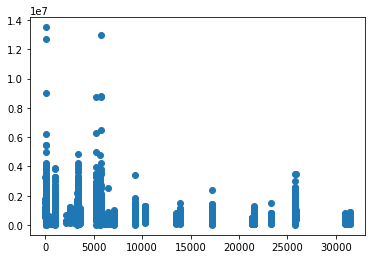

In [36]:
plt.scatter(X,y)

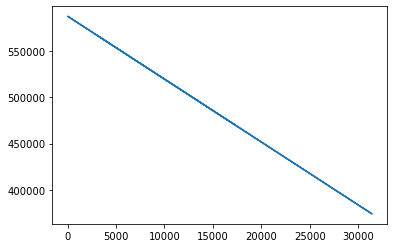

In [37]:
plt.plot(X,y_pred)
plt.show()

In [41]:
new_merge.corr()

,latestPrice,zipcode,Incident_Number
latestPrice,1.000000,-0.145946,-0.143854
zipcode,-0.145946,1.000000,0.110272
Incident_Number,-0.143854,0.110272,1.000000


In [42]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.020694001839744458